## Movies Rating Visualization

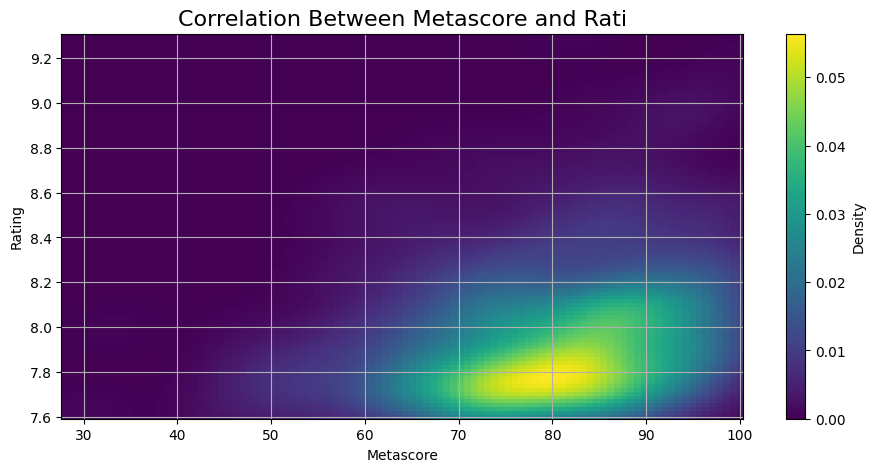

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the dataset
movies_df = pd.read_csv("D:\\DataCamp\\Datasets\\movies.csv")

# Remove rows with missing Metascore
movies_df.dropna(subset=['Metascore'], inplace=True)

# Calculate kernel density estimate for KDE plot
x = movies_df['Metascore']
y = movies_df['rating']
k = gaussian_kde(np.vstack([x, y]))

# Evaluate KDE on a grid
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Plot KDE
plt.figure(figsize=(11, 5))
plt.title('Correlation Between Metascore and Rati', fontsize=16)
plt.xlabel('Metascore')
plt.ylabel('Rating')
plt.grid(True)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='viridis')
plt.colorbar(label='Density')
plt.show()
